In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
file1 = "Resources/2015.csv"
file2 = "Resources/2016.csv"
file3 = "Resources/2017.csv"
file4 = "Resources/2018.csv"
file5 = "Resources/2019.csv"
health_2015 = pd.read_csv(file1)
health_2016 = pd.read_csv(file2)
health_2017 = pd.read_csv(file3)
health_2018 = pd.read_csv(file4)
health_2019 = pd.read_csv(file5)
frames = [health_2015, health_2016, health_2017, health_2018, health_2019]
result = pd.concat(frames)
health_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Columns: 285 entries, Country to Young people (ages 15-24) newly infected with HIV
dtypes: float64(204), int64(80), object(1)
memory usage: 351.9+ KB


In [41]:
health_2015_clean = health_2015.replace(0, np.nan)
health_2015_clean = health_2015_clean.dropna(how='all')
health_2015_clean.head()

,Country,Happiness Score,Diabetes prevalence (% of population ages 20 to 79),Prevalence of overweight (% of adults),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15-49) newly infected with HIV,"Age at first marriage, female",...,Urban population (% of total population),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Switzerland,7.587,NaN,53.9,3.0590,16000.0,500.0,16000.0,500.0,30.6,...,73.718,1.168186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,7.561,NaN,58.8,7.5054,NaN,NaN,NaN,NaN,28.1,...,93.700,1.077161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,7.527,NaN,55.1,4.2482,NaN,NaN,NaN,NaN,31.7,...,87.526,0.839047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,7.522,NaN,57.9,5.5002,NaN,NaN,NaN,NaN,31.8,...,81.091,1.488338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,7.427,NaN,63.7,9.6298,NaN,NaN,NaN,NaN,27.1,...,81.259,0.796808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
vars = health_2015[['Urban population (% of total population)', 'Mortality rate, infant (per 1,000 live births)']]
vars_clean = vars[vars['Urban population (% of total population)'] != 0]
# plt.scatter(vars['Urban population (% of total population)'], vars['Life expectancy at birth, total (years)'])
vars_clean = vars_clean.rename_axis('ID').values
vars_clean

array([[ 73.718,   3.8  ],
       [ 93.7  ,   1.8  ],
       [ 87.526,   3.5  ],
       [ 81.091,   2.2  ],
       [ 81.259,   4.6  ],
       [ 85.225,   2.   ],
       [ 90.173,   3.4  ],
       [ 86.553,   2.3  ],
       [ 86.341,   4.5  ],
       [ 85.701,   3.3  ],
       [ 92.179,   3.2  ],
       [ 76.862,   7.7  ],
       [ 57.715,   3.   ],
       [ 79.285,  13.9  ],
       [ 81.671,   5.8  ],
       [ 85.77 ,  14.   ],
       [ 90.179,   2.4  ],
       [ 62.538,   3.2  ],
       [ 97.876,   3.2  ],
       [ 85.674,   6.7  ],
       [ 82.626,   3.8  ],
       [ 81.35 ,   9.6  ],
       [ 88.154,  16.4  ],
       [100.   ,   2.2  ],
       [ 66.696,  14.6  ],
       [ 77.2  ,   3.3  ],
       [ 87.36 ,   6.7  ],
       [ 98.945,   6.7  ],
       [ 79.655,   3.5  ],
       [ 91.503,  10.2  ],
       [ 73.477,   2.5  ],
       [ 95.045,   7.6  ],
       [ 79.764,  13.4  ],
       [ 47.694,   9.3  ],
       [ 83.18 ,   7.2  ],
       [ 79.602,   2.7  ],
       [ 94.414,   6.1  ],
 

In [21]:
# Create dummy data
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=500, centers=6,
                            cluster_std=0.70, random_state=0)

In [22]:
# Plot and show scatter

In [54]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans


# Create a kmeans model using k = 12
kmeans = KMeans(n_clusters=3, random_state=0).fit(vars_clean)
predicted_clusters = kmeans.predict(vars_clean)
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`

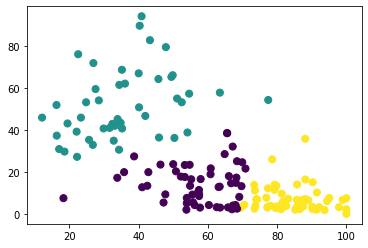

In [55]:
# Plot the clusters
plt.scatter(vars_clean[:, 0], vars_clean[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [ ]:
# Bonus
# Print the cluster centers and cluster labels
# YOUR CODE HERE
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()